In [8]:
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [11]:
dia_df = pd.read_csv('/Users/karthickrajamani/datasets/diabetics/diabetes.csv')
dia_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


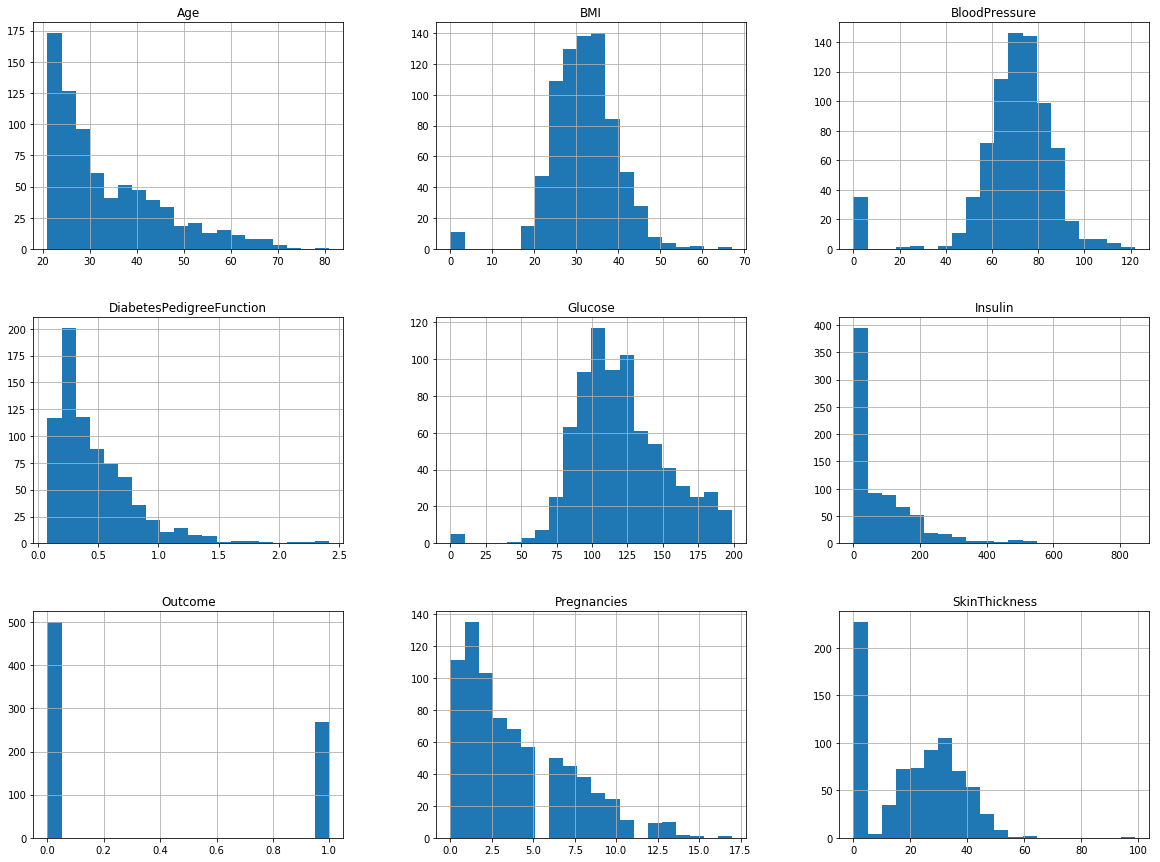

In [12]:
from matplotlib import pyplot as plt
dia_df.hist(bins=20, figsize = (20,15))
plt.show()

In [13]:
dia_df.dtypes
corr_matrix = dia_df.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ae36828>,
      dtype=object)

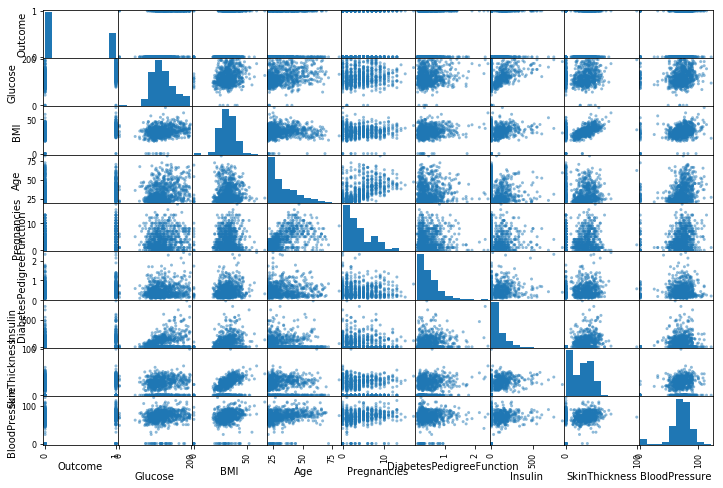

In [15]:
from pandas.tools.plotting import scatter_matrix
attributes = ['Outcome', 'Glucose','BMI','Age','Pregnancies','DiabetesPedigreeFunction','Insulin','SkinThickness','BloodPressure']
scatter_matrix(dia_df[attributes], figsize=(12, 8))

In [16]:

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dia_df, test_size = 0.25, random_state = 42)
print ("Train test shape is {0} and Test set shape is {1}".format(train_set.shape,test_set.shape))

Train test shape is (576, 9) and Test set shape is (192, 9)


In [17]:
X_train = train_set.drop(['Outcome'], axis=1)
y_train = train_set['Outcome']
X_test = test_set.drop(['Outcome'], axis=1)
y_test = test_set['Outcome']

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(lr, X_train, y_train, cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[333,  44],
       [101,  98]])

In [22]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train,y_train)
sgd_clf

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [23]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/site-packages/s

array([[326,  51],
       [155,  44]])

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train, y_train)
rfc_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
y_train_pred = cross_val_predict(rfc_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[325,  52],
       [ 96, 103]])

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
y_train_pred = cross_val_predict(dt_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[302,  75],
       [ 87, 112]])

In [28]:
y_test_pred = rfc_clf.predict(X_test)
confusion_matrix(y_test_pred,y_test)

array([[99, 25],
       [24, 44]])

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'min_samples_leaf' : [1,5,10], 'min_samples_split' : [2,5,10]}]
rfc_clf=RandomForestClassifier()
grid_search = GridSearchCV(rfc_clf, param_grid, cv=3, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train,y_train)

print (grid_search.best_params_, grid_search.best_estimator_)

cvres = grid_search.cv_results_
for mean_score, params in zip (cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(- mean_score), params)


{'min_samples_leaf': 10, 'min_samples_split': 5} RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.5068968775248516 {'min_samples_leaf': 1, 'min_samples_split': 2}
0.5034602488997738 {'min_samples_leaf': 1, 'min_samples_split': 5}
0.48947250518628044 {'min_samples_leaf': 1, 'min_samples_split': 10}
0.4841229182759271 {'min_samples_leaf': 5, 'min_samples_split': 2}
0.4947642536265799 {'min_samples_leaf': 5, 'min_samples_split': 5}
0.4823265376162594 {'min_samples_leaf': 5, 'min_samples_split': 10}
0.4732423621500228 {'min_samples_leaf': 10, 'min_samples_split': 2}
0.4658474953124562 {'min_samples_leaf': 10, 'min_samples